In [1]:
!pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.3/192.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 11.7 MB/s eta 0:00:00


In [2]:
# import tensorflow as tf

# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   print(
#       '\n\nThis error most likely means that this notebook is not '
#       'configured to use a GPU.  Change this in Notebook Settings via the '
#       'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
#   raise SystemError('GPU device not found')

Compiling model...
Building feed-forward neural network...
'build' took 0.065272 s

'compile' took 0.466874 s

Training model...

Step      Train loss              Test loss               Test metric             
0         [4.23e+01, 2.15e-01]    [4.79e+01, 2.15e-01]    [7.34e-01, 3.89e+08]    
Epoch 1: train loss improved from inf to 4.25e+01, saving model to model/model-1.ckpt ...

1000      [1.96e-04, 1.74e-07]    [2.51e-04, 1.74e-07]    [3.16e-04, 4.80e+05]    
Epoch 1000: train loss improved from 4.25e+01 to 1.96e-04, saving model to model/model-1000.ckpt ...

2000      [8.50e-05, 1.08e-08]    [1.59e-04, 1.08e-08]    [1.34e-04, 1.22e+05]    
Epoch 2000: train loss improved from 1.96e-04 to 8.50e-05, saving model to model/model-2000.ckpt ...

3000      [5.77e-05, 1.75e-07]    [1.16e-04, 1.75e-07]    [3.89e-04, 4.67e+05]    
Epoch 3000: train loss improved from 8.50e-05 to 5.79e-05, saving model to model/model-3000.ckpt ...

4000      [3.23e-05, 7.09e-08]    [8.53e-05, 7.09e-08]    

Saving the movie of spectrum to model/movie_spectrum.txt, model/movie_spectrum.gif...



Best model at step 8000:
  train loss: 1.37e-05
  test loss: 5.89e-05
  test metric: [2.92e-04, 2.16e+05]

'train' took 36.446171 s

Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


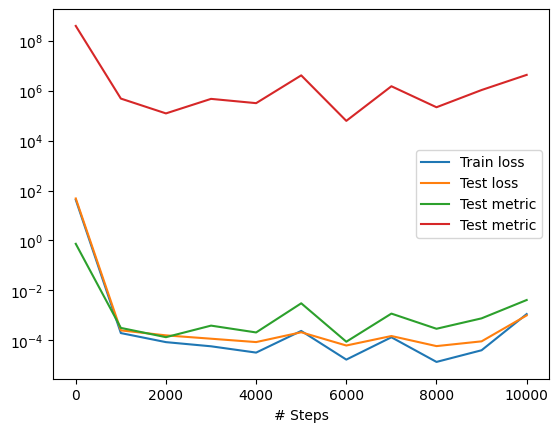

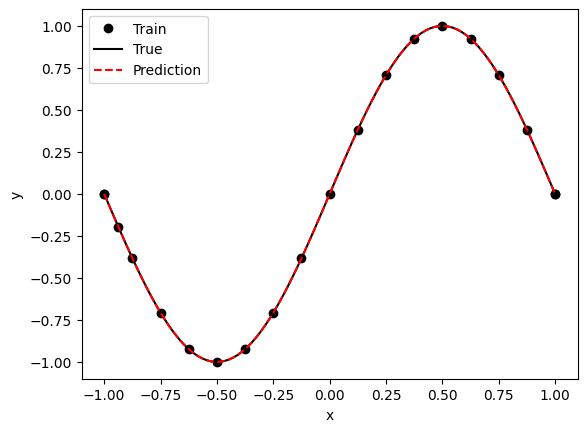

Restoring model from model/model-8000.ckpt ...



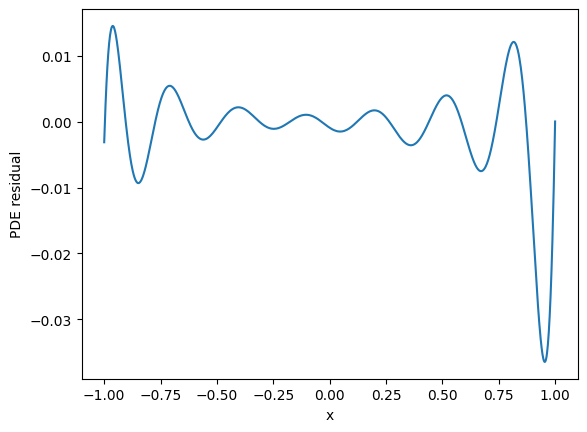

In [23]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
# Import torch if using backend pytorch
# import torch
# Import jax.numpy if using backend jax
# import jax.numpy as jnp
# Import paddle if using backend paddle
# import paddle


def pde(x, y):
    # Most backends
    dy_xx = dde.grad.hessian(y, x)
    # Backend jax
    # dy_xx, _ = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    # Use torch.sin for backend pytorch
    # return -dy_xx - np.pi ** 2 * torch.sin(np.pi * x)
    # Use jax.numpy.sin for backend jax
    # return -dy_xx - np.pi ** 2 * jnp.sin(np.pi * x)
    # Use paddle.sin for backend paddle
    # return -dy_xx - np.pi ** 2 * paddle.sin(np.pi * x)


def boundary(x, on_boundary):
    return on_boundary


def func(x):
    return np.sin(np.pi * x)


geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error", "max APE"])

#losshistory, train_state = model.train(iterations=10000)
# Optional: Save the model during training.
checkpointer = dde.callbacks.ModelCheckpoint(
    "model/model", verbose=1, save_better_only=True )
# Optional: Save the movie of the network solution during training.
# ImageMagick (https://imagemagick.org/) is required to generate the movie.
movie = dde.callbacks.MovieDumper(
     "model/movie", [-1], [1], period=100, save_spectrum=True, y_reference=func
  )
losshistory, train_state = model.train(iterations=5000, callbacks=[checkpointer, movie])
#losshistory, train_state = model.train(iterations=5000, callbacks=[checkpointer])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Optional: Restore the saved model with the smallest training loss
model.restore(f"model/model-{train_state.best_step}.ckpt", verbose=1)
# Plot PDE residual
x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Enable just-in-time compilation with XLA.



Compiling model...
Building feed-forward neural network...
'build' took 0.078801 s

'compile' took 0.818613 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [8.93e-01, 1.69e-01]    [8.93e-01, 1.69e-01]    [7.89e-01]    
Epoch 1: train loss improved from inf to 1.06e+00, saving model to model/model-1.ckpt ...

1000      [2.63e-04, 2.38e-04]    [1.56e-04, 2.38e-04]    [2.03e-02]    
Epoch 1000: train loss improved from 1.06e+00 to 5.01e-04, saving model to model/model-1000.ckpt ...

2000      [9.11e-05, 9.74e-05]    [5.51e-05, 9.74e-05]    [1.29e-02]    
Epoch 2000: train loss improved from 5.01e-04 to 1.89e-04, saving model to model/model-2000.ckpt ...

3000      [5.92e-05, 4.22e-05]    [3.84e-05, 4.22e-05]    [8.83e-03]    
Epoch 3000: train loss improved from 1.89e-04 to 1.01e-04, saving model to model/model-3000.ckpt ...

4000      [4.96e-05, 8.85e-05]    [3.84e-05, 8.85e-05]    [1.45e-02]    
5000      [2.83e-05, 1.58e-05]    [

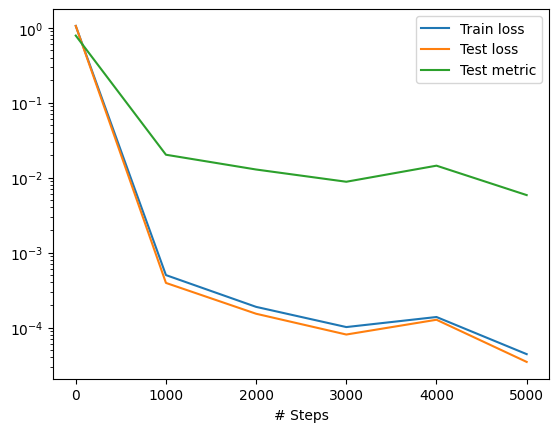

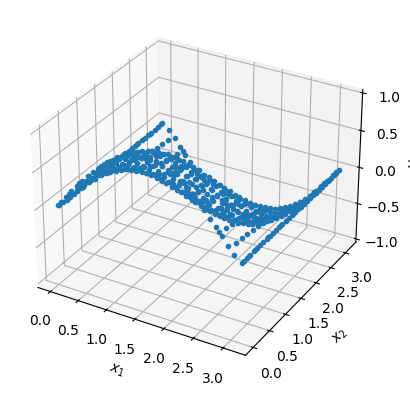

Restoring model from model/model-5000.ckpt ...



In [3]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
from deepxde.backend import tf

#frequencies of solution
a = 1
b = 1
#domain boundaries
xmax = np.pi
ymax = np.pi
xmin = 0
ymin = 0
#number of iterations for training
N_iter = 5000

#precise solution
def u_precise(x):
  return np.sin(a*x[:, 0:1])*np.cos(b*x[:, 1:2])

#right hand side of Laplace equation
def f_right(x):
  return (a**2 + b**2)*tf.sin(a*x[:, 0:1])*tf.cos(b*x[:, 1:2])

def f_r(x):
  return (a**2 + b**2)*np.sin(a*x[:, 0:1])*np.cos(b*x[:, 1:2])

def g(x):
  return np.sin(a*x[:, 0:1])*np.cos(b*x[:, 1:2])

def pde(x, u):
    # Most backends
    du_xx = dde.grad.hessian(u, x, i=0, j=0)
    du_yy = dde.grad.hessian(u, x, i=1, j=1)
    # Backend jax
    # dy_xx, _ = dde.grad.hessian(y, x, i=0, j=0)
    # dy_yy, _ = dde.grad.hessian(y, x, i=1, j=1)
    f = (a**2 + b**2)*tf.sin(a*x[:, 0:1])*tf.cos(b*x[:, 1:2])
    return -du_xx - du_yy - f_right(x)

def boundary(_, on_boundary):
    return on_boundary

geom = dde.geometry.Rectangle([0, 0], [xmax, ymax])
#for zero boundary-conditions
#bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)
bc = dde.icbc.DirichletBC(geom, g, boundary)
data = dde.data.PDE(geom, pde, bc, num_domain=40**2, num_boundary=4*40, num_test=300, solution = u_precise)
net = dde.nn.FNN([2] + [70] * 4 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)


model.compile("adam", lr=0.001, metrics = ["l2 relative error"])
#model.compile("adam", lr=0.001)
# Optional: Save the model during training.
checkpointer = dde.callbacks.ModelCheckpoint(
    "model/model", verbose=1, save_better_only=True )
#model.compile("L-BFGS", metrics = ["l2 relative error"])
with tf.device('/device:GPU:0'):
  losshistory, train_state = model.train(iterations=N_iter, callbacks=[checkpointer])
  dde.saveplot(losshistory, train_state, issave=True, isplot=True)
# Optional: Restore the saved model with the smallest training loss
model.restore(f"model/model-{train_state.best_step}.ckpt", verbose=1)

In [10]:
#Number of points for predicted solution
N = 100
x = geom.uniform_points(N*N, True)

#alternative way of creating flat array of points for solution evaluation
#X, Y = np.meshgrid(np.linspace(0, np.pi, 100), np.linspace(0, np.pi, 100))
#x = np.vstack([X.ravel(order = 'F'), Y.ravel(order = 'F')]).T

#u - predicted solution, u_pr - precise solution

#call model.predict(x, operator=pde) returns residual of the equation! not the solution itself
u = model.predict(x).reshape(N, N, order='F')
u_pr = u_precise(x).reshape(N, N, order='F')
residual = model.predict(x, operator=pde).reshape(N, N, order='F')

#eps_l2 = np.linalg.norm(u-u_pr)/np.linalg.norm(u_pr)
eps_l2 = dde.metrics.l2_relative_error(u_pr, u)
eps_c = np.max(u-u_pr)
residual_l2 = np.linalg.norm(residual)/np.linalg.norm(f_r(x))
residual_c = np.max(residual)

print("eps_l2 = ", eps_l2)
print("eps_c = ",eps_c)
print("residual_l2 = %r", residual_l2)
print("residual_c = %r", residual_c)

eps_l2 =  0.004943659
eps_c =  0.0061992193
residual_l2 =  0.0048463996
residual_c =  0.03263827


Text(0, 0.5, 'u')

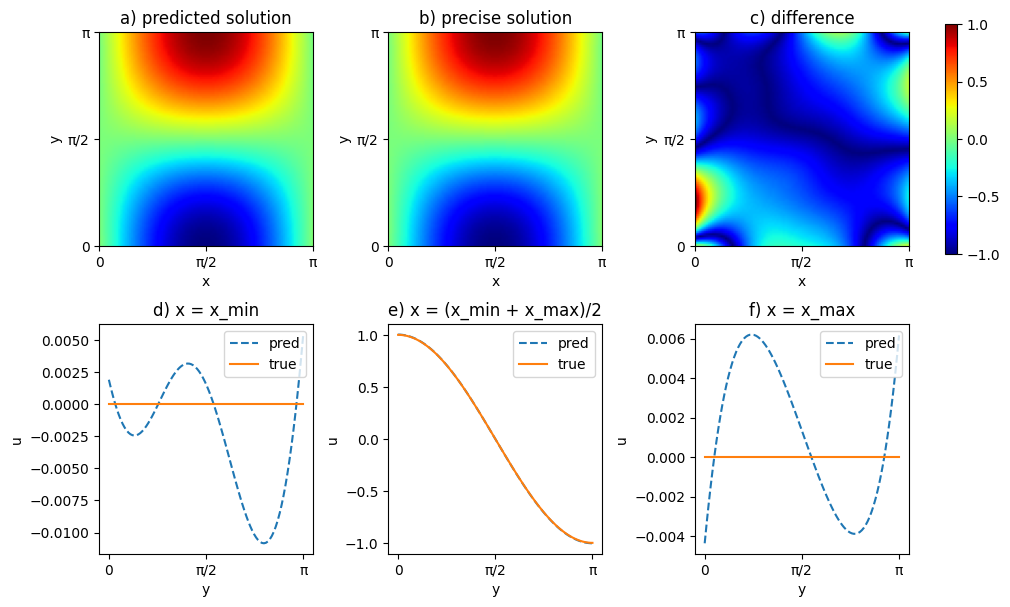

In [13]:
#plot graphs
import matplotlib.ticker as mticker

# u = u.reshape(N,N, order='F')
# u_pr = u_pr.reshape(N, N, order='F')

fig, axes = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True)

# Set colormap
cmap = 'jet'

# Subplot a)
im1 = axes[0, 0].imshow(u, extent=[0, np.pi, 0, np.pi], cmap=cmap)
axes[0, 0].set_title("a) predicted solution")
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[0, 0].set_xticks([0, np.pi/2, np.pi])
axes[0, 0].set_xticklabels(['0', 'π/2', 'π'])
axes[0, 0].set_yticks([0, np.pi/2, np.pi])
axes[0, 0].set_yticklabels(['0', 'π/2', 'π'])

# Subplot b)
im2 = axes[0, 1].imshow(u_pr, extent=[0, np.pi, 0, np.pi], cmap=cmap)
axes[0, 1].set_title("b) precise solution")
axes[0, 1].set_xticks([0, np.pi/2, np.pi])
axes[0, 1].set_xticklabels(['0', 'π/2', 'π'])
axes[0, 1].set_yticks([0, np.pi/2, np.pi])
axes[0, 1].set_yticklabels(['0', 'π/2', 'π'])
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("y")

# Subplot c)
im3 = axes[0, 2].imshow(np.abs(u_pr-u), extent=[0, np.pi, 0, np.pi], cmap=cmap)
axes[0, 2].set_title("c) difference")
axes[0, 2].set_xticks([0, np.pi/2, np.pi])
axes[0, 2].set_xticklabels(['0', 'π/2', 'π'])
axes[0, 2].set_yticks([0, np.pi/2, np.pi])
axes[0, 2].set_yticklabels(['0', 'π/2', 'π'])
axes[0, 2].set_xlabel("x")
axes[0, 2].set_ylabel("y")

# Central colorbar for (a, b, d, e)
cbar = fig.colorbar(im2, ax=[axes[0, 0], axes[0, 1], axes[0, 2]],
                      pad=0.04, location='right', fraction = 0.053, ticks = mticker.LinearLocator(numticks = 5 ))

# Subplot d)
y1 = np.linspace(0, np.pi, N)
#x = 0
im4 = axes[1, 0].plot(y1, u[:, 0], '--', label = 'pred')
axes[1, 0].plot(y1, u_pr[:, 0], label = 'true')
axes[1, 0].legend(loc='upper right')
axes[1, 0].set_title("d) x = x_min")
axes[1, 0].set_xticks([0, np.pi/2, np.pi])
axes[1, 0].set_xticklabels(['0', 'π/2', 'π'])
axes[1, 0].set_xlabel("y")
axes[1, 0].set_ylabel("u")

# Subplot e)
#x = pi/2
im5 = axes[1, 1].plot(y1, u[:, N//2-1], '--', label = 'pred')
axes[1, 1].plot(y1, u_pr[:, N//2-1], label = 'true')
axes[1, 1].legend(loc='upper right')
axes[1, 1].set_title("e) x = (x_min + x_max)/2")
axes[1, 1].set_xticks([0, np.pi/2, np.pi])
axes[1, 1].set_xticklabels(['0', 'π/2', 'π'])
axes[1, 1].set_xlabel("y")
axes[1, 1].set_ylabel("u")

# Subplot f)
#x = pi
im6 = axes[1, 2].plot(y1, u[:, N-1], '--', label = 'pred')
axes[1, 2].plot(y1, u_pr[:, N-1], label = 'true')
axes[1, 2].legend(loc='upper right')
axes[1, 2].set_title("f) x = x_max")
axes[1, 2].set_xticks([0, np.pi/2, np.pi])
axes[1, 2].set_xticklabels(['0', 'π/2', 'π'])
axes[1, 2].set_xlabel("y")
axes[1, 2].set_ylabel("u")